
# Auther :- Arun Kumar

## 10/3/2021
## A quick tutorial on how to implement linear regressions with the Python

# Simple Linear Regression

## Objectives

After completing this lab you will be able to:

*   Use scikit-learn to implement simple Linear Regression
*   Create a model, train it, test it and use the model


# Imported Needed Package

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

# Input dataset

In [78]:
Inputdata = pd.read_csv('C:\PythonData\SynthSalaryData.csv')
Inputdata.head()

,YearsExperience,Salary
0,1,1000
1,2,2000
2,3,3000
3,4,4000
4,5,5000


In [79]:
Inputdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   YearsExperience  39 non-null     int64
 1   Salary           39 non-null     int64
dtypes: int64(2)
memory usage: 752.0 bytes


In [80]:
# Let’s explore the data a little bit by checking the number of rows and columns in our datasets.
Inputdata.shape

(39, 2)

In [81]:
# This describes the basic stat behind the dataset used 
Inputdata.describe()

,YearsExperience,Salary
count,39.000000,39.000000
mean,20.000000,20000.000000
std,11.401754,11401.754251
min,1.000000,1000.000000
25%,10.500000,10500.000000
50%,20.000000,20000.000000
75%,29.500000,29500.000000
max,39.000000,39000.000000


<Figure size 864x432 with 0 Axes>

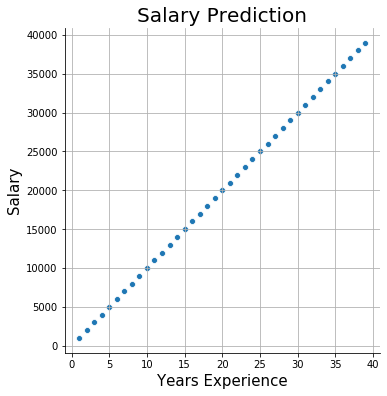

In [82]:
plt.figure(figsize=(12,6))
sns.pairplot(Inputdata,x_vars=['YearsExperience'],y_vars=['Salary'], height=5,kind='scatter')
plt.xlabel('Years Experience', fontsize='15')
plt.ylabel('Salary',fontsize='15')
plt.title('Salary Prediction', fontsize='20')
plt.grid (True)
plt.show()

In [83]:
Results = pd.DataFrame({'Algorithm': [],'MAE': [], 'R^2': [], "MSE":[], "RMSE":[]})

In [84]:
X = Inputdata['YearsExperience'].values.reshape(-1,1)
y = Inputdata['Salary'].values.reshape(-1,1)

In [85]:
# Import Segregating data from scikit learn

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.8,random_state=100)

In [86]:
# Importing Linear Regression model from scikit learn

from sklearn.linear_model import LinearRegression
# # Create linear regression object
regressor= LinearRegression ()
# Train the model using the training data
regressor.fit(X_train,y_train)
# Predicting the Salary for the Test values
y_pred=regressor.predict(X_test)

In [87]:
# Intecept and coeff of the line
print('Intercept of the model:',regressor.intercept_)
print('Coefficient of the line:',regressor.coef_)

Intercept of the model: [0.]
Coefficient of the line: [[1000.]]


In [88]:
# Compare the actual and predicted output values for X_test with predicted values 
df = pd.DataFrame({'Years of Experience': X_test.flatten(), 'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

,Years of Experience,Actual,Predicted
0,19,19000,19000.0
1,20,20000,20000.0
2,38,38000,38000.0
3,1,1000,1000.0
4,39,39000,39000.0
5,7,7000,7000.0
6,27,27000,27000.0
7,8,8000,8000.0


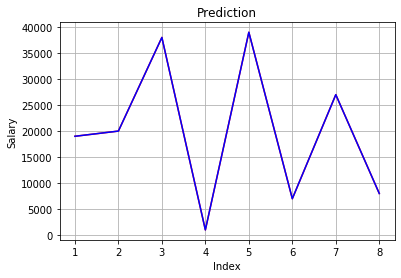

In [89]:
# Plotting the actual and predicted values 

c = [i for i in range (1,len(y_test)+1,1)]
plt.plot(c,y_test,color='r',linestyle='-',)
plt.plot(c,y_pred,color='b',linestyle='-',)
plt.xlabel('Index')
plt.ylabel('Salary')
plt.title("Prediction",fontsize='12')
plt.grid (True)
plt.show()

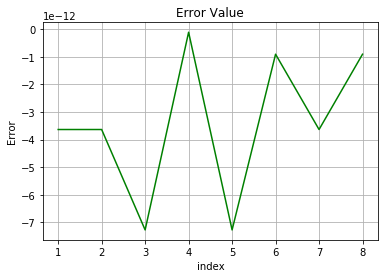

In [90]:
# plotting the error
error=y_test.flatten()-y_pred.flatten()
c = [i for i in range(1,len(y_test)+1,1)]
plt.plot(c, error, color='green', label="error", linestyle='-')
plt.xlabel('index')
plt.ylabel('Error')
plt.title('Error Value',fontsize='12')
plt.grid (True)
plt.show()

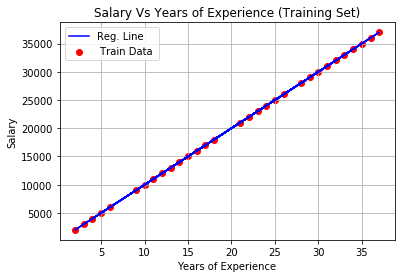

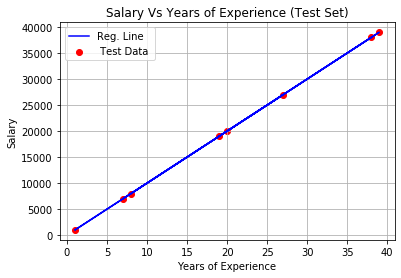

In [91]:
# Data visualization 
plt.scatter(X_train, y_train, color='red', label=" Train Data ")                      # Training data point
plt.plot(X_train,regressor.predict(X_train), color="blue", label="Reg. Line")         # regression line
plt.title("Salary Vs Years of Experience (Training Set)",fontsize='12')
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.grid (True)
plt.legend()
plt.show()

plt.scatter(X_test, y_test, color='red', label=" Test Data ")                      # Testing data point
plt.plot(X_test,regressor.predict(X_test), color="blue", label="Reg. Line")       # regression line
plt.title("Salary Vs Years of Experience (Test Set)",fontsize='12')
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.grid (True)
plt.legend()
plt.show()


In [92]:
# Regression Model Accurancy Metrics
# The Mean Absolute error(MAE), Mean squared error (MSE), Root mean squared error (RMSE), and R-Squared-
# are mainly used metrics to evaluate the prediction error rates and model performance in regression analysis.

# Mean Absolute Error (MAE) is the mean of the absolute value of the errors​.
# Mean Squared Error (MSE) is the mean of the squared errors 
# Root Mean Squared Error (RMSE) is the square root of the mean of the squared errors

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from math import sqrt 

print('Mean absolute error (MAE):->', mean_absolute_error(y_test, y_pred))
print('Mean Square error (MSE):->', mean_squared_error(y_test, y_pred))
print('Root mean Square Error (RMSE):->', np.sqrt(mean_squared_error(y_test, y_pred)))
print('r2 score :->', r2_score(y_test,y_pred))

res = pd.DataFrame({'Algorithm': ['LinearRegression'],'MAE': [mean_absolute_error(y_test, y_pred)],"R^2": [r2_score(y_test, y_pred)], "MSE":[mean_squared_error(y_test, y_pred)], "RMSE":[sqrt(mean_squared_error(y_test, y_pred))]})
Results = Results.append(res)

Mean absolute error (MAE):-> 3.424815986363683e-12
Mean Square error (MSE):-> 1.8406384216438758e-23
Root mean Square Error (RMSE):-> 4.290266217432056e-12
r2 score :-> 1.0


In [93]:
Results

,Algorithm,MAE,R^2,MSE,RMSE
0,LinearRegression,3.424816e-12,1.0,1.840638e-23,4.290266e-12


In [94]:
# Prediction

# YearsExperience (X)
X= input(" Enter the years of experience to predict the salary :-> ")
y_pred=regressor.intercept_+regressor.coef_*float(X)
print(f'The predicted salary values based on the {X} year of experience  :- ', y_pred)

 Enter the years of experience to predict the salary :-> 25
The predicted salary values based on the 25 year of experience  :-  [[25000.]]
